In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

In [2]:
df_teste = pd.read_csv('test.csv')

In [3]:
df_treino = pd.read_csv('train.csv')

In [4]:
df_teste = df_teste.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',\
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'])
df_treino = df_treino.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',\
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'])

<h2>Alunos faltantes</h2>

In [5]:
df_treino.TP_PRESENCA_LC = df_treino.TP_PRESENCA_LC.dropna()

In [6]:
df_treino.TP_PRESENCA_CH = df_treino.TP_PRESENCA_CH.dropna()

In [7]:
df_treino.TP_PRESENCA_CN = df_treino.TP_PRESENCA_CN.dropna()

<h2>Limpando e trocando letras por números</h2>

In [8]:
df_treino = df_treino.fillna(0)
df_teste = df_teste.fillna(0)

In [9]:
def troca_genero_num(data):
    if data == 'Sim':
        return 1
    else:
        return 0

In [10]:
def troca_num_letras(data):
    if data == 'A':
        return 1
    elif data == 'B':
        return 2
    elif data == 'C':
        return 3
    elif data == 'D':
        return 4
    elif data == 'E':
        return 5
    elif data == 'F':
        return 6
    elif data == 'G':
        return 7
    elif data == 'H':
        return 8
    elif data == 'I':
        return 9
    elif data == 'J':
        return 10
    elif data == 'K':
        return 11
    elif data == 'L':
        return 12
    elif data == 'M':
        return 13
    elif data == 'N':
        return 14
    elif data == 'O':
        return 15
    elif data == 'P':
        return 16
    elif data == 'Q':
        return 17
    else:
        return data

In [11]:
df_treino.Q001 = df_treino.Q001.apply(troca_num_letras)
df_teste.Q001 = df_teste.Q001.apply(troca_num_letras)

In [12]:
df_treino.Q002 = df_treino.Q002.apply(troca_num_letras)
df_teste.Q002 = df_teste.Q002.apply(troca_num_letras)

In [13]:
df_treino.Q006 = df_treino.Q006.apply(troca_num_letras)
df_teste.Q006 = df_teste.Q006.apply(troca_num_letras)

In [14]:
df_treino.Q024 = df_treino.Q024.apply(troca_num_letras)
df_teste.Q024 = df_teste.Q024.apply(troca_num_letras)

In [15]:
df_treino.Q025 = df_treino.Q025.apply(troca_num_letras)
df_teste.Q025 = df_teste.Q025.apply(troca_num_letras)

In [16]:
df_treino.Q026 = df_treino.Q026.apply(troca_num_letras)
df_teste.Q026 = df_teste.Q026.apply(troca_num_letras)

In [17]:
df_treino.Q027 = df_treino.Q027.apply(troca_num_letras)
df_teste.Q027 = df_teste.Q027.apply(troca_num_letras)

In [18]:
df_treino.Q047 = df_treino.Q047.apply(troca_num_letras)
df_teste.Q047 = df_teste.Q047.apply(troca_num_letras)

In [19]:
df_treino.TP_SEXO = df_treino.TP_SEXO.apply(troca_genero_num)
df_teste.TP_SEXO = df_teste.TP_SEXO.apply(troca_genero_num)

<h3> No arquivo de treino possui diversas variáveis, porém não sentido treiná-las faz sendo que no arquivo de teste possui algumas delas. Logo, as variáveis que estão no arquivo de treino foram colocadas as mesmas variáveis que estão no arquivo de treino.</h3>

In [20]:
df_treino = df_treino[['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', \
            'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',\
            'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',\
            'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',\
            'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',\
            'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA','TP_STATUS_REDACAO', 'NU_NOTA_COMP1', \
            'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001',\
            'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047','NU_NOTA_MT']]

In [21]:
len(df_treino.columns)

47

<h2>Algumas variáveis não contribuem para análise, por este motivo algumas delas serão excluídas.</h2>

In [22]:
df_treino = df_treino.drop(columns=['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',\
                                    'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT','SG_UF_RESIDENCIA'])

df_teste = df_teste.drop(columns=['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',\
                                    'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT','SG_UF_RESIDENCIA'])

<h2> No heatmap abaixo nos possibilita ver as variáveis que possuem correlações que podem nos auxiliar na escolhe de características para ajudar a predizer as notas. </h2>

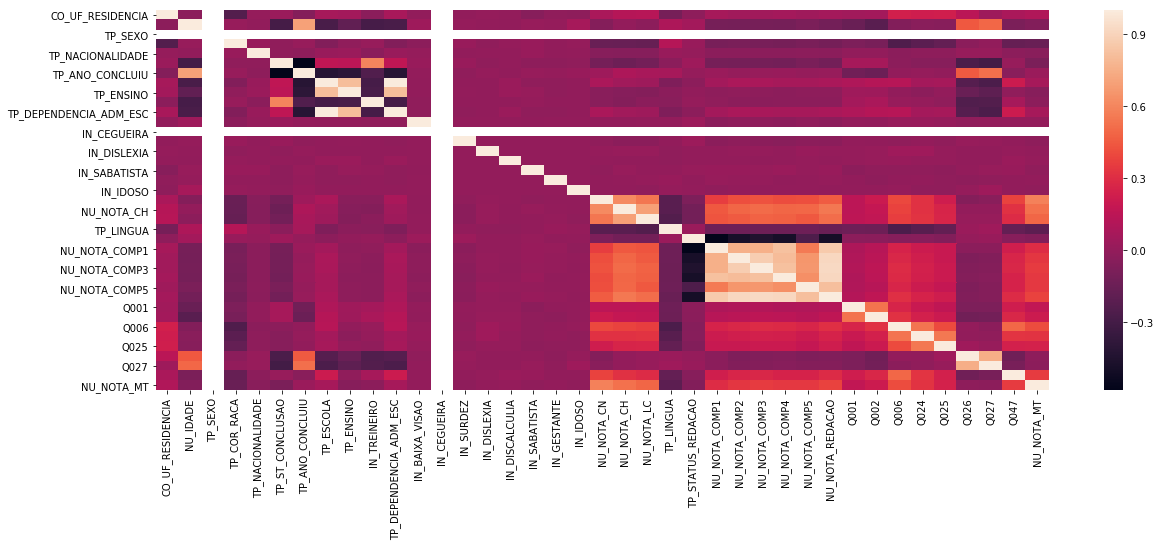

In [23]:
plt.figure(figsize=(20,7))
sns.heatmap(df_treino.corr())

In [24]:
X = df_treino.drop(columns='NU_NOTA_MT')
y = df_treino.NU_NOTA_MT

<h3>Utilizando Regressão Linear da biblioteca sklearn</h3>

In [25]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn import svm

def svr_Linear(X,y):
    regr = LinearSVR(random_state=0, tol=1e-5)
    regr.fit(X, y) 
    return regr

In [26]:
regr = svr_Linear(X,y)

In [27]:
df_teste.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [28]:
len(df_treino.columns)

39

In [29]:
regr.predict([[33,20,1,2,1,1,4,2,0,2,0,0,0,0,0,0,0,0,0,482.7,582.8,467,1,1,120,80,120,120,80,\
                520,3,4,7,2,2,2,2,1]])[0]


463.80618505199561

In [30]:
df_resultado = pd.DataFrame()
df_resultado['NU_INSCRICAO'] = ''
df_resultado['NU_NOTA_MT'] = 0

In [31]:
for i in range(len(df_teste)):
    inscricao = df_teste.iloc[i,0]
    df_resultado.set_value(i,'NU_INSCRICAO',inscricao)
    var = df_teste.iloc[i,1:39]
    var = np.array(var)
    var = var.reshape(1, -1)
    nota = regr.predict(var)[0]
    df_resultado.set_value(i,'NU_NOTA_MT',nota)
    

/home/wandella/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/wandella/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [32]:
var = df_teste.iloc[18,1:39]
var = np.array(var)
var = var.reshape(1, -1)


In [33]:
regr.predict(var)[0]

552.8872839062318

In [34]:
teste = df_teste[df_teste.NU_INSCRICAO=="5a9d89465845ac2d81366275cbb1a81d627efd36"]

In [35]:
for i in teste.iterrows():
    print(i)

In [36]:
df_resultado.to_csv('answer.csv',index=False)

In [37]:
df_resultado.describe()

,NU_NOTA_MT
count,3360.000000
mean,444.433080
std,57.743091
min,293.159565
25%,402.995449
50%,433.282979
75%,475.679241
max,709.067048
